In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Loading data

dataset = pd.read_csv("Shopping_center.csv")

print(dataset.head())
print(dataset.tail())

# independent variables - annual income & spending points
X = dataset.iloc[:, [3,4]].values
# print(X)


   Customer ID  Gender  Age  Annual Income in K$  Spending Points (1-100)
0        15101    Male   19                   15                       39
1        15102    Male   21                   15                       81
2        15103  Female   20                   16                        6
3        15104  Female   23                   16                       77
4        15105  Female   31                   17                       40
     Customer ID  Gender  Age  Annual Income in K$  Spending Points (1-100)
195        15296  Female   35                  120                       79
196        15297  Female   45                  126                       28
197        15298    Male   32                  126                       74
198        15299    Male   32                  137                       18
199        15300    Male   30                  137                       83


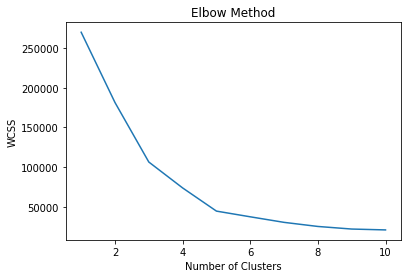

In [5]:
# Elbow Method - to determine the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Fitting k-means to dataset

kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)

y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


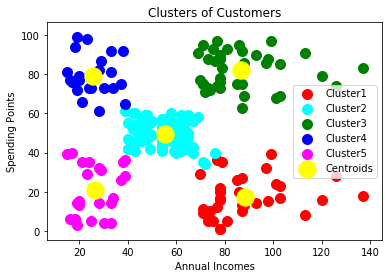

In [9]:
# Visualizing the clusters

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Cluster1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='cyan', label='Cluster2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='blue', label='Cluster4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Incomes')
plt.ylabel('Spending Points')
plt.legend()
plt.show()